## IMPLEMENTATION OF DIJKSTRA ALGORITHM

In [1]:
import math
import heapq as hq
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def dijkstra(G, s):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n

  cost[s] = 0
  pqueue = [(0, s)]
  # While pqueue have nodes on it
  while pqueue:
    # Extract minimium distance g = weight | u = index of the node
    g, u = hq.heappop(pqueue) 
    # Loop through all adjacent of u (Which are not visited)
    # and for every vertex in v:
    if not visited[u]: 
        visited[u] = True # changing state to visited in [u] true
        for v, w in G[u]: # getting all the vertex where u points
                          # finding every v vertex and w: weight
            if not visited[v]: # if v is not visited
                f = g + w # getting the actual weight of u: g + v: w
                if f < cost[v]: # if the new weight is less than
                                # another cost in v, lets change
                    cost[v] = f # the new cost of v
                    path[v] = u # update the path
                    hq.heappush(pqueue, (f, v)) 
                    # push in the pqueue the v vertex and the 
                    # calculated weight f
  return path, cost

In [14]:
def dijkstra(graph, fromP, toP):
    nodes,edges = graph[0],graph[1]
    visited = {node: False for node in nodes}
    path = []
    cost = {node: math.inf for node in nodes}
    #Starting point starts with 0
    cost[fromP] = 0 
    pqueue = [(0,fromP)]
    
    while pqueue:
        u_weight, u = hq.heappop(pqueue) # This case starts u = 'A'
        
        if u == toP: return path, cost # Return in case find the 'toP' edge
        if not visited[u]:
            visited[u] = True
            for edge in [edge for edge in edges if edge[0] == u]:
                # if the first value of a tuple is u get the edge
                v,v_weight = edge[1], edge[2]
                if not visited[v]:
                    new_weight = v_weight + u_weight
                    if new_weight < cost[v]:
                        cost[v] = new_weight
                        path.append(edge)
                        hq.heappush(pqueue, (new_weight, v))
    return path, cost

In [47]:
nodes = ['A','B','C','D','E','F','G','H']
edges = [('A','B', 3),('A','C', 1),('B','D', 5),('C','D', 2),
          ('C','E', 5),('B','E', 3),('E','F', 10),('D','F', 1),
          ('F','G', 2),('F','H', 5),('E','H', 4)]
graph = [nodes, edges]

G = dijkstra(graph=graph,fromP='A',toP='G')

adj_list = G[0]
union_graph = nx.DiGraph()
union_graph.add_weighted_edges_from(edges)
G

([('A', 'B', 3),
  ('A', 'C', 1),
  ('C', 'D', 2),
  ('C', 'E', 5),
  ('D', 'F', 1),
  ('F', 'G', 2),
  ('F', 'H', 5)],
 {'A': 0, 'B': 3, 'C': 1, 'D': 3, 'E': 6, 'F': 4, 'G': 6, 'H': 9})

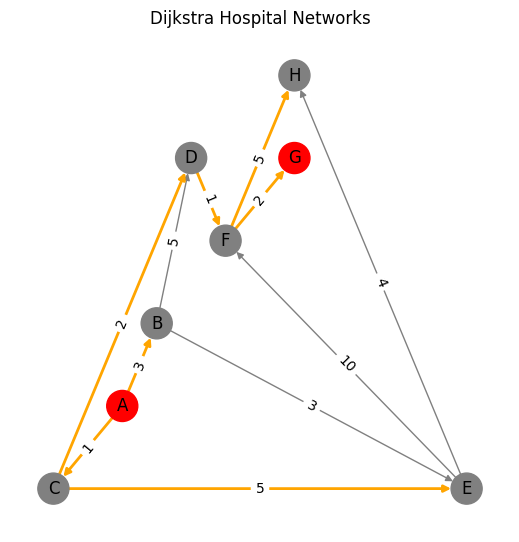

In [26]:
def visualize_graph(union_graph, adj_list):
    # Define node colors
    node_colors = {'A': 'red', 'G': 'red'}
    edge_colors = {(node[0],node[1]) : 'orange' for node in adj_list}
    
    plt.figure(figsize=(5, 5))
    pos = nx.planar_layout(union_graph)
    # Create a list of colors for nodes and edges
    node_color_list = [node_colors.get(node, 'gray') for node in union_graph.nodes()]
    edge_color_list = [edge_colors.get((u, v), 'gray') for u, v in union_graph.edges()]
    edge_widths = [2 if edge_colors.get((u, v)) else 1 for u, v in union_graph.edges()]
    # Draw the graph with specified colors
    nx.draw(union_graph, pos, with_labels=True, node_size=500, node_color=node_color_list, edge_color=edge_color_list, width=edge_widths)
    # Draw edge labels
    nx.draw_networkx_edge_labels(union_graph, pos, edge_labels=nx.get_edge_attributes(union_graph, 'weight'))
    # Display the graph
    plt.title("Dijkstra Hospital Networks")
    plt.axis('off')
    plt.show()

visualize_graph(union_graph, adj_list)


In [45]:
print(list(union_graph.edges())[0:3])
print(union_graph.nodes())

[('A', 'B'), ('A', 'C'), ('B', 'D')]
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
